In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784')

In [2]:
import numpy as np
from sklearn import model_selection

indexes = np.random.randint(70000, size=5000)

data = mnist.data[indexes]
#print(data.shape)
target = mnist.target[indexes]

xtrain, xtest, ytrain, ytest = model_selection.train_test_split(
    data, target, train_size=0.8
)


In [3]:
from sklearn import neighbors

k = 10

clf = neighbors.KNeighborsClassifier(k)
clf.fit(xtrain, ytrain)

probas = clf.predict_proba(xtest)

In [4]:
from sklearn import datasets
import matplotlib.pyplot as plt

itest = 4

images = data.reshape((-1, 28, 28))
plt.imshow(images[itest],cmap=plt.cm.gray_r,interpolation="nearest")
plt.show()

print(probas[itest])

<Figure size 640x480 with 1 Axes>

[0.  0.  0.  0.  0.  0.  0.  0.1 0.  0.9]


In [5]:
#clf.score(xtest, ytest)
found_classes = clf.predict(xtest)

In [6]:
for itest in range(1,20):
    #itest = 4
    
    res =  " OK" if ytest[itest] == found_classes[itest] else ""

    print("Classe : " + ytest[itest] + " / " + found_classes[itest] + res)

Classe : 5 / 5 OK
Classe : 1 / 1 OK
Classe : 5 / 5 OK
Classe : 9 / 9 OK
Classe : 0 / 0 OK
Classe : 1 / 1 OK
Classe : 2 / 2 OK
Classe : 4 / 4 OK
Classe : 8 / 8 OK
Classe : 4 / 4 OK
Classe : 2 / 2 OK
Classe : 1 / 1 OK
Classe : 1 / 1 OK
Classe : 7 / 7 OK
Classe : 8 / 8 OK
Classe : 3 / 3 OK
Classe : 7 / 7 OK
Classe : 0 / 0 OK
Classe : 9 / 9 OK


In [7]:
# BAD

from sklearn.model_selection import KFold

scores_k = [0 for i in range(0,16)]

nb_splits = 10

# k = Nombre de voisins à considérer
for k in range(2,16):
    clf = neighbors.KNeighborsClassifier(k)    
    kf = KFold(n_splits=nb_splits, shuffle=True)

    

    for train_indexes, test_indexes in kf.split(data):
        # Calcul des xtest/ytest/xtrain/ytrain
        xtrain = data[train_indexes]
        xtest = data[test_indexes]
        ytrain = target[train_indexes]
        ytest = target[test_indexes]
    
        clf.fit(xtrain, ytrain)
        
        print(".", end = '')
        scores_k[k] += clf.score(xtest, ytest) / nb_splits
        
    
    print(scores_k[k])

..........0.9186000000000001
..........0.9282
..........0.9266
..........0.9272000000000001
..........0.9244
..........0.9254
..........0.925
..........0.9196000000000002
..........0.9214000000000001
..........0.92
..........0.9196000000000001
..........0.9172
..........0.9158
..........0.915


In [8]:
from sklearn.model_selection import cross_val_score
import numpy as np

scores_k2 = [0 for i in range(0,16)]

nb_splits = 10

# k = Nombre de voisins à considérer
for k in range(2,16):
    clf = neighbors.KNeighborsClassifier(k)
    #clf.fit(xtrain, ytrain)
    
    score = np.mean(cross_val_score(clf, xtrain, ytrain, cv=10))

    print("K = " + str(k) + " -> " + str(score))
    scores_k2[k] = score


K = 2 -> 0.9142338658980848
K = 3 -> 0.9235646679730338
K = 4 -> 0.9228999749873437
K = 5 -> 0.9273297360963346
K = 6 -> 0.9244521517339214
K = 7 -> 0.9244451517659888
K = 8 -> 0.9224402049699654
K = 9 -> 0.9246669032188292
K = 10 -> 0.9215606647185763
K = 11 -> 0.9186835117765769
K = 12 -> 0.9184503895075327
K = 13 -> 0.9151336978405611
K = 14 -> 0.9142304835738984
K = 15 -> 0.911570227757851


[0, 0, 0.9186000000000001, 0.9282, 0.9266, 0.9272000000000001, 0.9244, 0.9254, 0.925, 0.9196000000000002, 0.9214000000000001, 0.92, 0.9196000000000001, 0.9172, 0.9158, 0.915]


Text(0.5, 1.0, 'Score pour différentes valeurs de k')

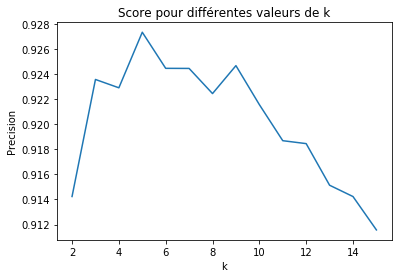

In [9]:
print(scores_k)

#plt.plot([x for x in range(2, 16)], scores_k[2:])
plt.plot([x for x in range(2, 16)], scores_k2[2:])

#plt.legend(['KFold', 'cross_val_score'], loc='upper right')
plt.xlabel("k")
plt.ylabel("Precision")
plt.title("Score pour différentes valeurs de k")

#sklearn tsne

# Résultat

Pour la suite, on prends la valeur k=5

In [10]:
from sklearn import neighbors

k=5
rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

scores_rate = []
for rate in rates:
    xtrain, xtest, ytrain, ytest = model_selection.train_test_split(
        data, target, train_size=rate
    )

    clf = neighbors.KNeighborsClassifier(k)
    clf.fit(xtrain, ytrain)
    
    #print(str(len(ytrain)) + " - - - " + str(rate))
    score = clf.score(xtest, ytest)
    
    #score = np.mean(cross_val_score(clf, xtest, ytest, cv=10))

    print("Rate = " + str(rate) + " -> " + str(score))
    scores_rate.append(score)    

Rate = 0.1 -> 0.8211111111111111
Rate = 0.2 -> 0.8805
Rate = 0.3 -> 0.8848571428571429
Rate = 0.4 -> 0.9006666666666666
Rate = 0.5 -> 0.9168
Rate = 0.6 -> 0.9205
Rate = 0.7 -> 0.926
Rate = 0.8 -> 0.928
Rate = 0.9 -> 0.926


Text(0.5, 1.0, 'Score pour différents pourcentages consacrés au train(k=5)')

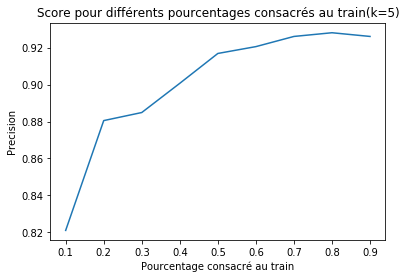

In [11]:
plt.plot([x for x in rates], scores_rate)

plt.xlabel("Pourcentage consacré au train")
plt.ylabel("Precision")
plt.title("Score pour différents pourcentages consacrés au train(k=" + str(k) +")")


# Résultat
Plus on alloue de données à l'entrainement, plus l'algorithme est efficace pour la classification.

In [12]:
from sklearn import neighbors

k=5
rate=0.8

# De 400 à 8000
sizes = [200*i for i in range(1, 51)]

scores_size = []
for size in sizes:
    
    indexes2 = np.random.randint(70000, size=size)

    data2 = mnist.data[indexes2]
    target2 = mnist.target[indexes2]

    xtrain, xtest, ytrain, ytest = model_selection.train_test_split(
        data2, target2, train_size=rate
    )

    clf = neighbors.KNeighborsClassifier(k)
    clf.fit(xtrain, ytrain)
    
    score = clf.score(xtest, ytest)

    print("Size = " + str(size) + " -> " + str(score))
    scores_size.append(score)

Size = 200 -> 0.725
Size = 400 -> 0.7625
Size = 600 -> 0.85
Size = 800 -> 0.85625
Size = 1000 -> 0.845
Size = 1200 -> 0.8625
Size = 1400 -> 0.8535714285714285
Size = 1600 -> 0.90625
Size = 1800 -> 0.8805555555555555
Size = 2000 -> 0.8725
Size = 2200 -> 0.9318181818181818
Size = 2400 -> 0.8916666666666667
Size = 2600 -> 0.9
Size = 2800 -> 0.9
Size = 3000 -> 0.9066666666666666
Size = 3200 -> 0.9078125
Size = 3400 -> 0.9161764705882353
Size = 3600 -> 0.9277777777777778
Size = 3800 -> 0.9276315789473685
Size = 4000 -> 0.92375
Size = 4200 -> 0.9226190476190477
Size = 4400 -> 0.9238636363636363
Size = 4600 -> 0.9173913043478261
Size = 4800 -> 0.9197916666666667
Size = 5000 -> 0.923
Size = 5200 -> 0.9394230769230769
Size = 5400 -> 0.9203703703703704
Size = 5600 -> 0.9178571428571428
Size = 5800 -> 0.9336206896551724
Size = 6000 -> 0.94
Size = 6200 -> 0.9274193548387096
Size = 6400 -> 0.92578125
Size = 6600 -> 0.9356060606060606
Size = 6800 -> 0.9397058823529412
Size = 7000 -> 0.93285714285714

Text(0.5, 1.0, "Score pour différentes tailles d'échantillon")

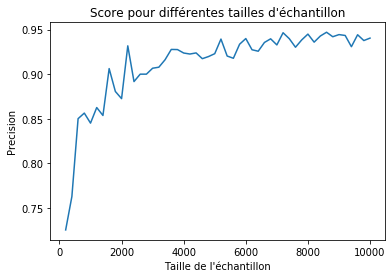

In [13]:
plt.plot([x for x in sizes], scores_size)

plt.xlabel("Taille de l'échantillon")
plt.ylabel("Precision")
plt.title("Score pour différentes tailles d'échantillon")


# Résultat
Plus la taille de l'échantillon est importante, plus la précision de l'algorithme est grande.

In [14]:
from sklearn import neighbors

k=5
rate = 0.8
ps = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
scores_p = []

for p in ps:
    xtrain, xtest, ytrain, ytest = model_selection.train_test_split(
        data, target, train_size=rate
    )

    clf = neighbors.KNeighborsClassifier(k, p=p)
    clf.fit(xtrain, ytrain)
    
    score = clf.score(xtest, ytest)

    print("P = " + str(p) + " -> " + str(score))
    scores_p.append(score)    

P = 1 -> 0.916
P = 2 -> 0.92
P = 3 -> 0.933
P = 4 -> 0.931
P = 5 -> 0.933
P = 6 -> 0.933
P = 7 -> 0.932
P = 8 -> 0.921
P = 9 -> 0.931
P = 10 -> 0.944


Text(0.5, 1.0, 'Score pour différentes valeurs de p(k=5)')

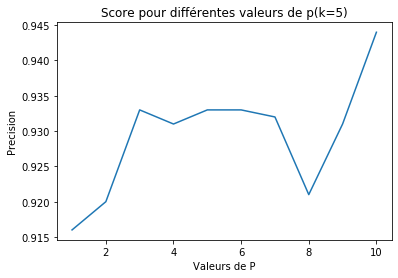

In [15]:
plt.plot([x for x in ps], scores_p)

plt.xlabel("Valeurs de P")
plt.ylabel("Precision")
plt.title("Score pour différentes valeurs de p(k=" + str(k) +")")


# Résultat

Augmentation de la précision en augmentant la norme utilisée

In [16]:
from sklearn import neighbors
import time


k=5
rate = 0.8
p = 7

xtrain, xtest, ytrain, ytest = model_selection.train_test_split(
    data, target, train_size=rate
)

# Mesure avec n_jobs = 1
start_time = time.time()
clf = neighbors.KNeighborsClassifier(k, p=p, n_jobs = 1)
clf.fit(xtrain, ytrain)
score = clf.score(xtest, ytest)
end_time = time.time()

print("n_jobs = 1 -> " + str(score) + " time : " + str(end_time - start_time))


# Mesure avec n_jobs = -1
start_time = time.time()
clf = neighbors.KNeighborsClassifier(k, p=p, n_jobs = -1)
clf.fit(xtrain, ytrain)
score = clf.score(xtest, ytest)
end_time = time.time()

print("n_jobs = -1 -> " + str(score) + " time : " + str(end_time - start_time))


n_jobs = 1 -> 0.932 time : 51.67013597488403
n_jobs = -1 -> 0.932 time : 8.853404760360718
